In [1]:
# Interactivity imports for buttons in the notebook
from IPython.display import HTML, Javascript, display
import IPython
from ipywidgets import interact, widgets
import random

# Create button that runs the below cell
def run_below(ev):
    display(Javascript('IPython.notebook.execute_cells([IPython.notebook.get_selected_index()+1])'))

run_code_below_button = widgets.Button(description="Run code")
run_code_below_button.on_click(run_below)

# Create toggle code button
def toggle_code(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide code'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        # toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

# Create the run code and toggle code buttons for the cell below
def create_buttons():
    display(run_code_below_button)
    display(toggle_code(for_next=True))
    
# Create a button that hides all the code in the notebook and autoruns on the notebook
hide_all_code_button = HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code for this notebook."></form>''')
display(hide_all_code_button)


# CODE BELOW WAS SUPPOSED TO BE A SMARTER TOGGLE BUTTON - DOESNT WORK YET
# javascript_functions = {False: "hide()", True: "show()"}
# button_descriptions  = {False: "Show code", True: "Hide code"}
# STATE = False
# def toggle_code(ev):
#     import random
#     for_next = True
#     this_cell = """$('div.cell.code_cell.rendered.selected')"""
#     next_cell = this_cell + '.next()'

#     toggle_text = 'Toggle show/hide'  # text shown on toggle link
#     target_cell = this_cell  # target cell to control with toggle
#     js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

#     if for_next:
#         target_cell = next_cell
#         toggle_text += ' next cell'
#         js_hide_current = this_cell + '.find("div.input").hide();'

#     js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

#     output = """
#         <script>
#             function {f_name}() {{
#                 {cell_selector}.find('div.input').toggle();
#             }}

#             {js_hide_current}
#         </script>

#         <a href="javascript:{f_name}()"></a>
#     """.format(
#         f_name=js_f_name,
#         cell_selector=target_cell,
#         js_hide_current=js_hide_current, 
#     )

#     display(HTML(output))


# def button_action(value):

#     """
#     Calls the toggle_code function and updates the button description.
#     """

#     state = value.new

#     toggle_code()
#     # Change the state
#     state = not state

#     value.owner.description = button_descriptions[state]
    
# def create_buttons():
#     state = False
#     #toggle_code(state)
#     code_toggle_button = widgets.ToggleButton(description = button_descriptions[state])
#     code_toggle_button.observe(button_action, "value")
#     display(widgets.HBox([run_code_below_button, code_toggle_button]))



# ALSO DOESNT WORK YET
# # Create toggle code button
# def toggle_code(for_next=True):
#     this_cell = """$('div.cell.code_cell.rendered.selected')"""
#     next_cell = this_cell + '.next()'

#     toggle_text = 'Toggle show/hide code'  # text shown on toggle link
#     target_cell = this_cell  # target cell to control with toggle
#     js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

#     if for_next:
#         target_cell = next_cell
#         # toggle_text += ' next cell'
#         js_hide_current = this_cell + '.find("div.input").hide();'

#     js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

#     html = """
#         <script>
#             function {f_name}() {{
#                 {cell_selector}.find('div.input').toggle();
#             }}

#             {js_hide_current}
#         </script>

#         <a href="javascript:{f_name}()">{toggle_text}</a>
#     """.format(
#         f_name=js_f_name,
#         cell_selector=target_cell,
#         js_hide_current=js_hide_current, 
#         toggle_text=toggle_text
#     )

#     return HTML(html)

# toggle_code_below_button = widgets.Button(description="Show/hide code")
# toggle_code_below_button.on_click(toggle_code)

# def create_buttons():
#     display(widgets.HBox([run_code_below_button, toggle_code_below_button]))

In [2]:
# Basic dependencies
import time

# Numerical and dataframe dependencies
import numpy as np
import pandas as pd

# Plotting dependencies
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import altair as alt
#alt.renderers.enable('notebook')
from livelossplot import PlotLosses
from livelossplot.tf_keras import PlotLossesCallback

# Machine Learning libraries
import sklearn.metrics as metrics
import tensorflow as tf
from tf_explain.core.grad_cam import GradCAM

# Library settings
tf.random.set_seed(42)
tf.get_logger().setLevel('INFO') # Ignore warning/depreciation messages in the logger

%matplotlib inline

In [3]:
# Set overall global variables
HEIGHT = 32
WIDTH = 32
NUM_CHANNELS = 3
IMG_SHAPE = (HEIGHT, WIDTH, NUM_CHANNELS)
CLASS_NAMES = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}
NUM_CLASSES = len(CLASS_NAMES) # 10

SAMPLE_SIZE = 101 # The number of samples to plot for the image sliders

DATA_LOADED = False # Add in more of these?!?!
DATA_PREPROCESSED = False
BASELINE_MODEL_BUILT = False
NN_CONFUSION_MATRIX = False

In [4]:
# Helper functions
def get_model_outputs(model, inputs):
    model_probs = model.predict(inputs)
    model_preds = model_probs.argmax(axis=1)
    return model_probs, model_preds

def print_confusion_matrix(predicted_labels, true_labels, class_names, figsize = (20,10), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    confusion_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
    confusion_matrix_norm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    cm_sum = np.sum(df_cm, axis=1)
    cm_perc = df_cm / cm_sum.astype(float) * 100
    
    fig = plt.figure(figsize=figsize)
    annot = np.empty_like(df_cm).astype(str)
    nrows, ncols = df_cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = df_cm.iloc[i][j]
            p = cm_perc.iloc[i][j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    
    heatmap = sns.heatmap(df_cm, annot=annot, fmt='')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.tight_layout()
    
def checkpoint(checkpoint_number=None):
    assert isinstance(checkpoint_number, int), 'The checkpoint number must be an integer!'
    vars_to_check = [
        DATA_LOADED,
        DATA_PREPROCESSED,
        BASELINE_MODEL_BUILT,
        NN_CONFUSION_MATRIX
    ]
    error_messages = [
        "Please first load the data",
        "Please preprocess the data before you train the neural networks",
        "Please first build the baseline Neural Network model",
        "Please first run the confusion matrix"
    ]
    
    error_message_endstring = """ \n
    (This is probably just because you missed a button, so try clicking the button above and then clicking this
    one again. If that doesnt work, try pressing all of the above buttons in order and rerunning this cell again 
    by pressing the button)
    """
    
    for var_to_check, error_message in list(zip(vars_to_check, error_messages))[:checkpoint_number]:
        assert var_to_check, " ".join([error_message, error_message_endstring])

# 🤖 Intro to AI Notebook 🤖

_Remark: Any references to other Digital Catapult talk offerings will consistently be labelled as **<span style="text-decoration:underline;">Talk X</span>** throughout this notebook. Please don’t hesitate to ask a member of the Digital Catapult team for more information if you are interested._

<img src="images/IntroToAIOpeningImage.jpeg" width="600">

Welcome to the _JuPyter notebook_ ! This is the classic environment for a Data Scientist and Machine Learning Engineer. This is often where we experiment with pieces of code, look and analyse data and build machine learning models. It is also a useful tool for presenting the findings of our analyses in a clear manner.

We have set this notebook up in a special and unusual way today - all the code cells will be hidden, so you don't have to worry about it. But, if you would like to take a look then you can toggle the code on and off at any time!

You can also toggle on and off the code in the entire notebook with the button at the top.

The way we will interact with this notebook is as below:



*   The **"run code"** cell will run the code in the hidden cell;
*   The **toggle code** button will allow you to see the underlying code, if you wish

You can try out these buttons below! The buttons below will print out the phrase ```Hello world``` - any good programmers first piece of code!

> **The button below will print out the phrase** ```Hello world```




In [5]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

In [17]:
print('Hello world!')

Hello world!


## §0: Introduction

The intention of this notebook is to give you an interactive and friendly introduction to AI and Machine Learning by stepping through a classic data science/Machine Learning workflow.

<img src="images/DataScienceLifeCycle.jpg" width="800" title="Data Science Workflow">

A classic Machine Learning workflow is made up of the following general steps:



*   Discovery phase
*   Data Preparation Phase
*   Model Iteration / Development Phase
*   Analysis and communication of results
*   Operationalisation and Deployment

These are discussed in more detail in the **_<span style="text-decoration:underline;">Data Science Process</span>_** talk and workshop.


## §1: Discovery Phase

While this is an important element of any good Machine Learning project (see the "Data Science Process" talk), we defer the details for this workshop. In particular, suppose the outcomes of this were as follows:


### §1.1 Problem Definition

The problem definition that business X cares about is the classification of images. In particular, they want to develop a system that will take in RGB coloured images, and classify them into one of 10 pre-defined classes. These classes are:



*   airplane
*   automobile
*   bird
*   cat
*   deer
*   dog
*   frog
*   horse
*   ship
*   truck


#### §1.1.1 Inputs

The input will be a 32x32 pixel RGB colour photograph of objects from these 10 classes


#### §1.1.2 Outputs

The output of the Machine Learning model will be a prediction of the class


### §1.2 Data Mapping

For the purposes of this exercise, we will defer data mapping. We can assume that the data has already been collected. However, it is worth stressing that this is a really important part of the process. The other talks such as **_<span style="text-decoration:underline;">Data for AI</span> _**and **_<span style="text-decoration:underline;">Data Science Process</span>_** elaborate on this more, but it is important to think about whether or not the problem you have is suitable for machine learning before embarking on it to derisk it, and what datasets are available to you.


## §2: Data Preparation Phase

In this phase, we will prepare our inputs (defined above) ready for the models to be built. We will also perform some _"Exploratory Data Analysis"_ (EDA) to look at our data and the type of data that we have.


### §2.1: Data Collection

Usually, we have to track down our data which might be sitting in many different internal systems. To understand the types of data that are suitable for machine learning, you can learn more in the **_<span style="text-decoration:underline;">Data for AI</span>_** talk.

For our problem, we will work with image data, so our dataset is a collection of images. As for data collection, we will be using an _open source_ (public) dataset that anyone can access, so we don’t have any data collection issues. We will be working with the CIFAR dataset.

CIFAR is an acronym that stands for the [Canadian Institute For Advanced Research](https://www.cs.toronto.edu/~kriz/cifar.html) and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.

The dataset is comprised of 60,000 32x32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. We associate the class labels with integer values as below:



*   0: airplane
*   1: automobile
*   2: bird
*   3: cat
*   4: deer
*   5: dog
*   6: frog
*   7: horse
*   8: ship
*   9: truck

Now, we get the machine learning model to predict the correct “number”, which we can get the name of the corresponding class via this mapping.

These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

CIFAR-10 is a well-understood dataset and widely used for benchmarking computer vision algorithms in the field of machine learning. The problem is _“solved”_. It is relatively straightforward to achieve 80% classification accuracy. Top performance on the problem is achieved by deep learning convolutional neural networks with a classification accuracy of around 97% on the test dataset. Human accuracy is around 94% [1].

Today, we will show you how you can build an image recognition classifier to be able to achieve human accuracy.

First, we have to download the dataset!

> **The button below will download the dataset**

In [18]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

In [19]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Really we should also create a validation set - check if we want to do this or will it be too confusing?
# NUM_VAL_IMAGES = 10000
# from sklearn.model_selection import train_test_split 
# We will use this function to split our "training" set into our "training" + "validation" set - confusing name!
# (X_train, X_val), (y_train, y_val) = train_test_split(X_train, y_train, stratify=y_train, test_size=NUM_VAL_IMAGES)
# For now lets just set X_val, y_val to X_test, y_test
X_val, y_val = X_test, y_test

# Set global variables
N_TRAIN = len(X_train)
N_VAL = len(X_val)
N_TEST = len(X_test)

# Ensure the y values are also uint8 type
# y_train = y_train.astype(np.uint8)
# y_val = y_val.astype(np.uint8)
# y_test = y_test.astype(np.uint8)


print('Dataset loaded!')
DATA_LOADED = True

Dataset loaded!


### §2.2: Exploratory Data Analysis (EDA)

In this section, we use graphical and numerical techniques to begin uncovering the structure of our data.



*   What is the “distribution” of the variable we are trying to predict? 
*   What does the data look like?


#### §2.2.1: Data Visualisation

The first thing we do is plot the distribution of the variable we are trying to predict, which is in this case the “class” (image category) e.g dog, cat etc. We are splitting the dataset into 3 sets, as is common for machine learning. The three sets are:



*   Training
    *   The purpose of this is to train the machine learning model, by inputting data from which the model can learn patterns to predict the target variable (in this case, the image category)
*   Validation
    *   We use this to “test” our model. Since we will be developing many different types of models, we use this set of images to test between all the different models and decide which one is likely to perform the best on new data
*   Testing
    *   This is a completely “held out” dataset that the model has never seen before. The point of this dataset is to simulate “live data” to get a better measure of how the model would expect to perform if we were to operationalise it

The difference between validation and testing sets is subtle. If we only had two sets: training and testing, then we could keep choosing models that get better on the test set during this experimental, but wont generalise to a different set of data when the model is deployed. This would mean that we pick the best model for a specific set of data, rather than the best model “overall”. The diagram below shows this process.

<img src="images/machinelearningsets.png" width="600" title="Machine Learning Sets">

> **The button below will plot the distribution of image classes in each of the sets. You should see that there are 5,000 images of each class in the training data. You can use your mouse to hover over each category colour, and isolate a category by clicking the legend on the side**

In [20]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

In [21]:
# Set a checkpoint
checkpoint(0)

# Get the counts of each of the image types and put them in a dataframe
set_value_counts = pd.DataFrame([
    np.unique(y_train, return_counts=True)[1],
    np.unique(y_val, return_counts=True)[1],
    np.unique(y_test, return_counts=True)[1]
], index=['Training Set', 'Validation Set', 'Testing Set'])

set_value_counts.columns = set_value_counts.columns.map(CLASS_NAMES)
set_value_counts.columns.name = 'Image Class'
set_value_counts.index.name = 'Set Name'

# Transform the dataframe into a format suitable for altair
source = set_value_counts.reset_index().melt('Set Name')

# Create a multi selection index with every class pre-initialised
selection = alt.selection_multi(
    fields=["Image Class"]
)
color = alt.condition(
    selection, alt.Color("Image Class:N", legend=None), alt.value("lightgray")
)

barchart = (
    alt.Chart(source)
    .mark_bar()
    .encode(x=alt.X("Set Name:N", axis=alt.Axis(labelAngle=-45)),
            y="value:Q", color=color, 
            tooltip=[alt.Tooltip("Image Class:N", title='Image Class'), 
                     alt.Tooltip("value:N", title='Number of Images')])
    .add_selection(selection)
    .properties(width=700,height=450)
)

legend = (
    alt.Chart(source)
    .mark_point()
    .encode(y=alt.Y("Image Class:N", axis=alt.Axis(orient="right")), color=color)
    .add_selection(selection)
)

barchart | legend

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


The next thing we will do is actually plot some of the images for all of the classes and visualise what they look like.

> **The button below will plot a sample of the images. You can scroll through the images using the slider**

In [22]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

In [23]:
from ipywidgets import interact, widgets

checkpoint(0)

SAMPLE_SIZE = 101
img_idx_slider = widgets.IntSlider(value=0, min=0, max=SAMPLE_SIZE - 1, description="Image index", 
                                   layout=widgets.Layout(width='100%', height='50px'))

train_images_sample = {class_name: X_train[(y_train == class_idx).squeeze()][:SAMPLE_SIZE] 
                       for class_idx, class_name in CLASS_NAMES.items()}

@interact(i=img_idx_slider)
def visualize_prediction(i=0):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    for ax, class_name in zip(axes.flat, CLASS_NAMES.values()):
        ax.imshow(train_images_sample[class_name][i].squeeze())
        ax.set_title(f"Class / label: {class_name}")

interactive(children=(IntSlider(value=0, description='Image index', layout=Layout(height='50px', width='100%')…

### <span style="color:red"> Discussion Point</span>

**Q1**. Does the data look good based on these plots?



*   In the count plot of the images, what do you think a “good” and “bad” distribution of categories would look like?
*   Do you think the amount of data is OK?
*   What do you think of the image quality?


#### §2.2.2: Data Preprocessing

One key thing for computers is that we have to transform everything over to numbers - so when we are dealing with image data (or text data) we have to find a way of mapping each of the images into numbers that a computer can understand. Luckily, with RGB images we can do that. RGB Images are made up of pixels, and each pixel is a tuple $(R,G,B) = (x,y,z)$ where $x,y,z$ are all numbers between 0 and 255. That means we can instead represent each image as a _tensor of numbers_. We are going to define operations on them and build machine learning models so that the data can _flow_ through these sets of processes (hence the name _Tensorflow_ by Google, if you've heard of it!). A tensor is basically just an array of numbers.

The image below represents this process:

<img src="images/RGBImage.png" width="600" title="RGB Image converted into a tensor">

It turns out that neural networks learn better when their inputs are standardised, say between 0 and 1. The only preprocessing we do, therefore, is to divide these image arrays by 255 to ensure all the inputs fall between 0 and 1 instead of 0 and 255.

Normally, data preprocessing (or _“data cleaning”_ ) is quite a lengthy process. We can manipulate and transform the data in many different ways to extract _“features”_ which we use as an input to our neural networks. This is a combination of domain and problem knowledge, coupled with some standard machine learning and data science knowledge. It is usually an experimental trial-and-error exploratory process.

> **The button below will preprocess the dataset, ensuring it is suitable to input into a neural network**

In [24]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

In [25]:
checkpoint(0)

# Preprocessing - normalise the images
def preprocess_image(image_batch):
    return tf.cast(image_batch, tf.float32) / 255.0
#X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

DATA_PREPROCESSED = True

print('Images preprocessed successfully!')

Images preprocessed successfully!


## §3: Model Building Phase

In this phase, we begin by defining some baseline models to benchmark our performance


### §3.1: Baseline Neural Network Model

To get a sense of the problem, we start by building a very simple deep neural network model, which takes all the image pixels and flattens them into a row of numbers (instead of a grid). Then, we pass it through several “layers” of the model, combining these numbers together in complex (“non linear”) ways in an attempt to try and match the pixel values with the output class numbers. We hope that by training this network on the data, we can learn how to transform an input image of pixels into the correct output class. The “deepness” in a neural network refers to additional layers in our architecture, but abstractly represents additional layers of complex reasoning. We hope that the early layers in a neural network can identify things like edges, and these are combined later in the network to identify “features” of the image (such as a cat’s whiskers, or a ships chimney). These features would ordinarily be really hard to code for explicitly, so we get a model to implicitly learn them.

<img src="images/nn_architecture.jpg" width="600" title="Neural Network Architecture">


#### §3.1.1: Model definition

We define a basic model somewhat arbitrarily, just to test that the model starts to learn something and we have set everything up appropriately in the code (to _“test our pipeline”_ ). We can always change the model architecture later (and, indeed, we will). 


#### §3.1.2: Training the model

Now we are going to train the machine learning model. This process means we will feed in the training data to the model, it will pass through the model and the model will make a prediction. If the predicted label is wrong, then the model will change its parameters (through a process called_ backpropagation_) in an attempt to correct its mistakes.

The way a model knows that it is wrong is due to a **loss function**. You can think of this as a function that captures and encodes the objective we care about. For example, in the loss function there is normally an “error term”, which reflects how far away our prediction is from the true value according to some metric. Thus, our training procedure tries to **minimise the loss** (because we want to **minimise the error** of our model!) The loss function is also called the “cost function” (referencing to economics - we want to minimise our cost - high cost is bad, and low cost is good. Here “cost” is abstract, and nothing to do with money!).

You will see below the plots of the model training in real time. You should note that the loss function will decrease, since the model is minimising its error, and the model accuracy will increase, since it is refining its predictive power.

The validation data is to check our model performance. If our model is capable enough, it could just learn to memorise all the training examples in the dataset, thus getting zero loss/error and 100% accuracy, but it wouldn’t be able to generalise to new datapoints (in this case, images) outside of the training set! So the validation loss should also decrease, and the accuracy should increase but you would expect there to be a certain point where the model just starts to memorise the training, meaning the error on the validation set goes up again (instead of down) and the accuracy decreases. We use plots like this to decide the best time to stop our model training.

<table><tr>
    <td> <img src="images/loss_curves.png" alt="Typical Loss Curves" style="width: 500px;"/> </td>
    <td> <img src="images/accuracy_curves.png" alt="Typical Accuracy Curves" style="width: 400px;"/> </td>
</tr></table>

> **The button below will train the baseline neural network model**

In [26]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

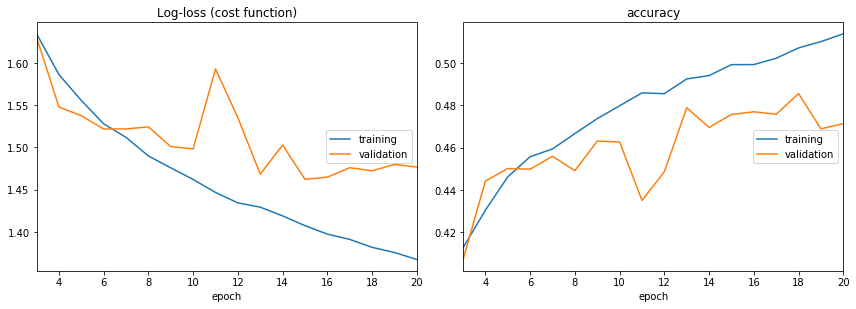

Log-loss (cost function):
training   (min:    1.367, max:    1.879, cur:    1.367)
validation (min:    1.462, max:    1.758, cur:    1.477)

accuracy:
training   (min:    0.316, max:    0.514, cur:    0.514)
validation (min:    0.375, max:    0.486, cur:    0.471)


In [27]:
checkpoint(1)

# Create the baseline model described in the text above (TODO)
baseline_NN_model = tf.keras.Sequential([
    tf.keras.layers.Input(IMG_SHAPE),
    # Preprocess the images
    tf.keras.layers.Lambda(lambda image_batch: preprocess_image(image_batch), name='Preprocessing'),
    # Flatten RGB image + NN
    tf.keras.layers.Flatten(name='Flatten'),
    tf.keras.layers.Dense(128, activation='relu', name='Dense_1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense_2'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax', name='Predictions')
], name='Baseline_NN_Model')

# Print model summary - potentially remove - or print out image here
print(baseline_NN_model.summary())

# Compile the model - we will use the Adam optimiser and categorical crossentropy loss, logging the accuracy
# TODO: Tensorboard here and integrate callbacks into live tracking below? Potentially just a cleaner interface
baseline_NN_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)  

# Fit the baseline model to the training data, validating against the validation data
baseline_NN_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size = 32,
    validation_data=(X_val, y_val),
    callbacks=[PlotLossesCallback()],
    verbose=0
)

BASELINE_MODEL_BUILT = True

### <span style="color:red"> Discussion Point</span>

You should notice that the accuracy increases over time (the plot on the right), and the loss/error decreases over time (the plot on the left) although the plots are quite “jagged”.

**Q2**. What do you notice about the accuracy of this model? Is it good enough? What would we expect the performance to be on this task?  \
_Hint: The most basic model we could think of, that is not machine learning at all, is just “randomly guessing the image class” or “always predicting the same class (e.g dog)”. What would the accuracy be in this case? Remember we have 10 classes, and the number of images is the same for each class in the training, validation and testing set?_

**Q3**. Do you think accuracy is a good measure of a models performance? \
_Hint: Suppose we only had two classes (“dog” and “cat”) and we had 9500 images of dogs and 500 images of cats. What would the accuracy of a classifier that always predicts “dog” be?_


#### §3.1.3: Evaluating the model

To test how our model performs we plot a “confusion matrix”. We plot the model performance on the test set of unseen data during testing. The model is introduced to new images, none of which it has ever seen before, and has to make predictions. Luckily, we know the true image classes as labels, so we can compare with what our model predicts vs the actual outcome and plot is as a grid. This is called a _confusion matrix._

This array provides a lookup table between the number of images of a certain class X to be predicted as class Y. The diagonal thus represents the number of images that were predicted correctly as class X. The “colour” of each square reflects the value, “hot” colours are high values - corresponding to a large number of images, and “cold” colours are low values - corresponding to a low number of images.

> **The button below will plot the confusion matrix for the Neural Network model**

In [11]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

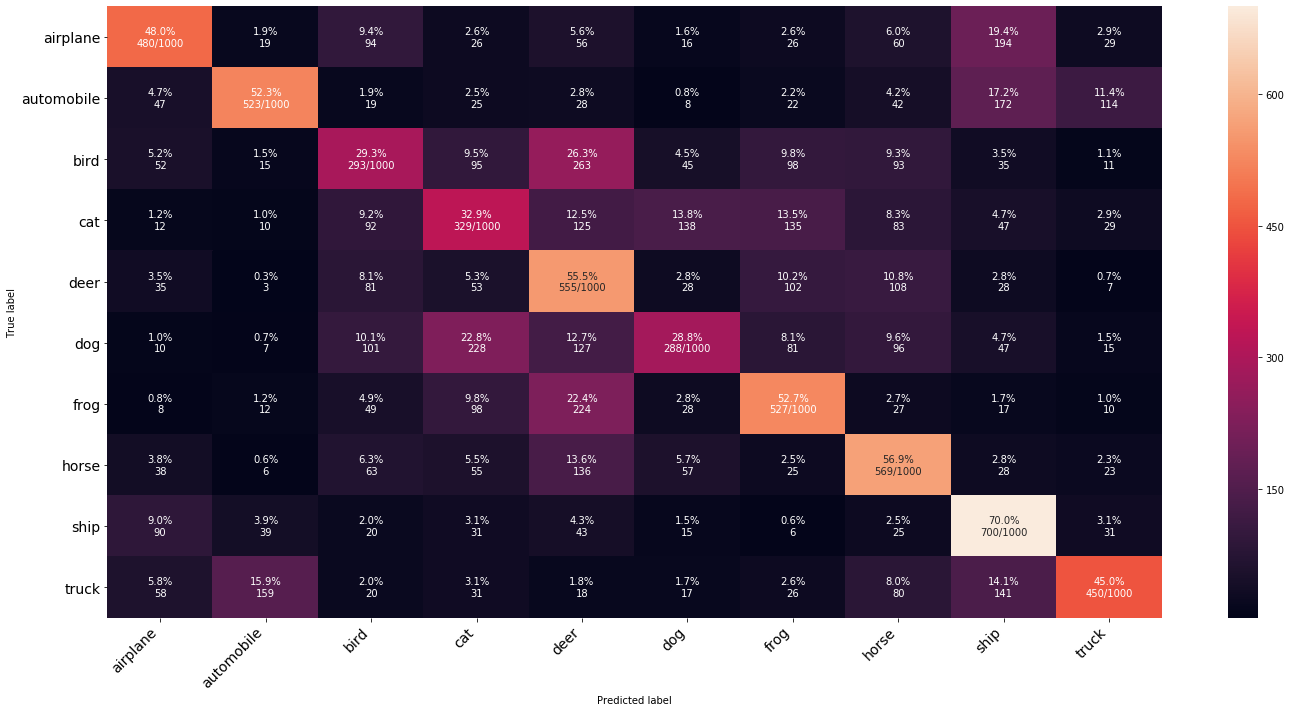

In [29]:
checkpoint(2)

baseline_NN_model_probs, baseline_NN_model_preds = get_model_outputs(baseline_NN_model, X_test)
print_confusion_matrix(baseline_NN_model_preds, y_test, class_names=CLASS_NAMES.values())

NN_CONFUSION_MATRIX = True

### <span style="color:red"> Discussion Point</span>

**Q4**. What would a good confusion matrix / heatmap look like in this context?

_Hint: What do the numbers on the diagonal represent?_



*   What about if the context were different, and instead the labels were “risk scores” from 1 to 5. What would we want our confusion matrix to look like in that case?

**Q5. **Which classes are “most confused” by the model? In other words, which classes does the model predict as wrong often? Do these seem sensible? 

_Hint: Look for the high numbers that aren’t on the diagonal._

#### §3.1.4: Exploring the models predictions

We can also plot the models predictions on unseen images (i.e images that the model was not trained on). The bar chart on the left shows the probabilities of each of the classes, with the golden bar being the predicted class.

> **The button below will plot the image predictions for the Neural Network model**

In [12]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

<IPython.core.display.Javascript object>

In [30]:
checkpoint(3)
## Nice image slider: https://sanjayasubedi.com.np/deeplearning/tensorflow-2-first-neural-network-for-fashion-mnist/
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(X_test)-1, description="Image index",
                                   layout=widgets.Layout(width='100%', height='50px'))

@interact(i=img_idx_slider)
def visualize_prediction(i=0):
    img_probs, img_pred = baseline_NN_model_probs[i], baseline_NN_model_preds[i].squeeze()
    fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(X_test[i])
    ax1.set_title(f"Label: {CLASS_NAMES[y_test[i][0]]}")
    ax1.set_xlabel(f"Prediction: {CLASS_NAMES[img_pred]}")

    sns.barplot(x=list(CLASS_NAMES.values()), y=img_probs*100, ax=ax2, 
                palette=['grey' if (prob < max(img_probs)) else 'gold' for prob in img_probs])
    plt.xticks(rotation=90)

interactive(children=(IntSlider(value=0, description='Image index', layout=Layout(height='50px', width='100%')…

### <span style="color:red"> Discussion Point</span>

**Q6**. Are the predictions of the model good? Why / why not?


## §4: Model Iteration Phase

Now we have been through the process of building one model, we can quickly iterate on our ideas to try and build a better one! This process is mainly trial and error and “following your nose” as a data scientist, as well as reading through the literature at similar architectures that worked well.


### §4.1: Building a model from the literature

Upon reading the literature, we find that a model called VGG-16 works well. VGG-16 is a type of Convolutional Neural Network (CNN), which is a particular structure proven to be good at image recognition tasks. It takes in an image, like the neural network before, but instead of just learning how to map the whole image onto the output image classes, it learns smaller squares/grids (called filters) from the image, which it applies to the input image in order to understand what is in the image. For example, it might learn to learn a “ear-like” grid as an intermediate feature, and the model will check if any incoming image has an ear like feature, meaning it is more likely to be an animal than, say, a car.

Don’t worry if you don’t understand the specifics, the key takeaway is that this model provides a bit more structure to the learning process, meaning we can learn a better mapping from images to classes than from the images alone (as in the previous model) from the same amount of data. If we had much more data then, theoretically, the model we used before would achieve the same performance as this one, but we help out the learning process by defining additional structure to enable the model to learn more effectively from the same amount of data. An example CNN architecture is shown below:

<img src="images/cnn_architecture.jpeg" width="600" title="CNN Architecture">


### §4.2: Training the model

Since this model is more complicated than the previous model, it would _take too long to train for this workshop_. Instead, we have already trained the model for you. Instead, we will show you what training would have looked like (sped up) and then we will load the model from our _pre-trained version_.

In machine learning, we can train a model and save it, then share it between different people so that they don’t have to go through the entire training process again. There are also some more advanced techniques where we can reuse “parts of a model” and training other bits of additional architecture in a modular way, and this is referred to as _transfer learning _since we are transferring some parts of a model over (and, in a sense, transferring the “knowledge of an already trained model” and reusing this on our task).

> **The button below will simulate the training of the more advanced “Convolutional Neural Network” (CNN)  VGG-16 architecture to show you what this training process would have looked like. This is not training in real time and it is sped up. At the end, we load the model that we have trained previously so you can use it.**

In [13]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

<IPython.core.display.Javascript object>

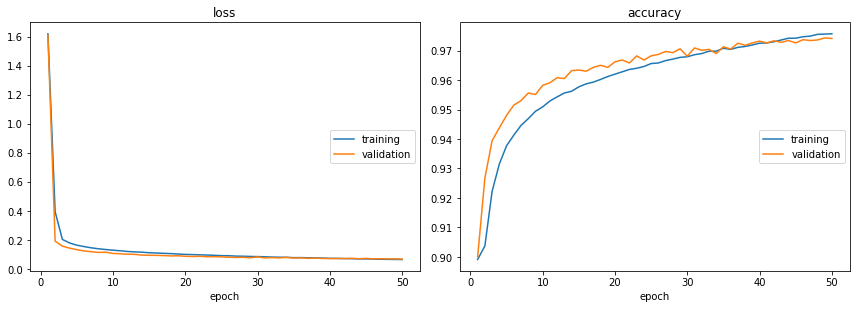

loss:
training   (min:    0.065, max:    1.620, cur:    0.065)
validation (min:    0.068, max:    1.612, cur:    0.068)

accuracy:
training   (min:    0.899, max:    0.976, cur:    0.976)
validation (min:    0.900, max:    0.974, cur:    0.974)


In [31]:
# Instantiate the VGG-16 like model
vgg_model = tf.keras.Sequential([ 
    # Define the model input explicitly here
    tf.keras.layers.Input(IMG_SHAPE),
    # Preprocess the images
    tf.keras.layers.Lambda(lambda image_batch: preprocess_image(image_batch), name='Preprocessing'),
    
    # VGG-16 normally expects 224x224 images, if we wanted we could upsample the images, but they are already blurry!
    #tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (224,224)), input_shape = IMG_SHAPE),
    
    # Block 1
    tf.keras.layers.Convolution2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", 
                                  name='block1_conv1'),
    tf.keras.layers.Convolution2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", 
                                  name='block1_conv2'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block1_pool'),

    # Block 2
    tf.keras.layers.Convolution2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", 
                                  name='block2_conv1'),
    tf.keras.layers.Convolution2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", 
                                  name='block2_conv2'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block2_pool'),

    # Block 3
    tf.keras.layers.Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", 
                                  name='block3_conv1'),
    tf.keras.layers.Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", 
                                  name='block3_conv2'),
    tf.keras.layers.Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", 
                                  name='block3_conv3'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block3_pool'),
 
    # Normally, VGG-16 has 5 Conv blocks, but we shorten this to 3 given the input image size and to ensure
    # inference is somewhat quicker. It also turns out this gets quite high accuracy whilst still being lightweight
    # - this is a process of trial and error!
#     # Block 4
#     tf.keras.layers.Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", 
#                                   name='block4_conv1'),
#     tf.keras.layers.Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", 
#                                   name='block4_conv2'),
#     tf.keras.layers.Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", 
#                                   name='block4_conv3'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block3_pool'),
    
#     # Block 5
#     tf.keras.layers.Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", 
#                                   name='block5_conv1'),
#     tf.keras.layers.Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", 
#                                   name='block5_conv2'),
#     tf.keras.layers.Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", 
#                                   name='block5_conv3'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block4_pool'),

    # Add classification layers on top of it, projecting the pretrained base model knowledge directly onto the classes
    # This is our initial attempt (one dense layer for a linear projection) but this is up to experimentation
    # The number of hidden units is a hyperparameter here!
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(256, activation='relu', name='dense_projection'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax', name='predictions')
], name='VGG-16 Adapted Model')

# Imitate the training of the model by reading the output from a previous training session
liveplot = PlotLosses(skip_first=0)
with open('VGG_results.txt', 'r') as vgg_results:
    for line_count, line in enumerate(vgg_results):
        # If we have an even line then it will say Epoch x/50 - extract the epoch number
        if line_count % 2 == 0:
            epoch_num = line_count // 2 + 1
        else:
            loss, acc, val_loss, val_acc = (float(line.split(": ")[metric_num][:6]) for metric_num in range(1,5))
            liveplot.update({
                'loss': loss,
                'val_loss': val_loss,
                'accuracy': acc,
                'val_accuracy': val_acc
            })
            liveplot.draw()
            time.sleep(1.)     

# Load the pretrained weights
vgg_model.load_weights('cifar10-vgg16-pretrained.h5')

### §4.3: Evaluating and comparing the models

As before, we will evaluate the model, using the same techniques as before.


#### §4.3.1: Plotting the confusion matrix

As for the previous model, we plot a confusion matrix.

> **The button below will plot the confusion matrix for the VGG-16 CNN model.**

In [14]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

<IPython.core.display.Javascript object>

In [ ]:
vgg_model_probs, vgg_model_preds = get_model_outputs(vgg_model, X_test)
print_confusion_matrix(vgg_model_preds, y_test, class_names=CLASS_NAMES.values())

### <span style="color:red"> Discussion Point</span>

**Q7**. Is this confusion matrix better or worse than before? Why?

**Q8**. As before, Which classes are “most confused” by the model? In other words, which classes does the model predict as wrong often? Do these seem sensible? 

_Hint: Look for the high numbers that aren’t on the diagonal._


#### §4.3.2: Comparing model predictions

We now compare the previous models on new data. We run the new images (the “test data”) through each of the models and get them to make predictions, and plot them in a bar chart. The golden bar indicates the chosen (“winning”) class and each bar represents the probability of being that class according to the model. We also plot the image. You can scroll through the images to see how the models predict using the slider.

> **The button below will plot the models predictions on new data as a bar chart, representing the probability of being each of the classes, with the golden bar representing the “winning” (predicted) class**

In [15]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

In [43]:
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(X_test)-1, description="Image index",
                                   layout=widgets.Layout(width='100%', height='50px'))

@interact(i=img_idx_slider)
def visualize_prediction(i=0):
    baseline_img_probs, baseline_img_pred = baseline_NN_model_probs[i], baseline_NN_model_preds[i].squeeze()
    vgg_img_probs, vgg_img_pred = vgg_model_probs[i], vgg_model_preds[i].squeeze()
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.imshow(X_test[i])
    ax1.set_title(f"Label: {CLASS_NAMES[y_test[i][0]]}")
    ax1.set_xlabel(f"Baseline Prediction: {CLASS_NAMES[baseline_img_pred]} \n VGG Prediction: {CLASS_NAMES[vgg_img_pred]}")

    sns.barplot(x=list(CLASS_NAMES.values()), y=baseline_img_probs*100, ax=ax2, 
                palette=['grey' if (prob < max(baseline_img_probs)) else 'gold' for prob in baseline_img_probs])
    ax2.set_title("Baseline Neural Network Model Prediction")
    
    sns.barplot(x=list(CLASS_NAMES.values()), y=vgg_img_probs*100, ax=ax3, 
                palette=['grey' if (prob < max(vgg_img_probs)) else 'gold' for prob in vgg_img_probs])
    ax3.set_title("VGG-16 Model Prediction")
    
    for axis in [ax2, ax3]:
        axis.set_ylim([0,100])
        axis.set_xticklabels(axis.get_xticklabels(), rotation=90)

interactive(children=(IntSlider(value=0, description='Image index', layout=Layout(height='50px', width='100%')…

### <span style="color:red"> Discussion Point</span>

**Q9**. Which model is better?

_Extra discussion point: The VGG-16 model (rightmost plot) is more “confident” in its predictions - is this necessarily a good thing?_


## §4: Extensions


### §4.1: Analysing “why” a model makes its prediction

A popular area of research in machine learning is “Explainable AI”, a branch of algorithm research that interrogates “why” a model makes its prediction. It has often been said that some AI systems are “black boxes”, in that they make predictions but the reasons and motivations on which these predictions are based are hard to decipher and comprehend. 

There are many different ways to try and explain what a model has learned, and no algorithm will ever be perfect, but we can use it as a helpful indicator to diagnose some of the decision making used by these systems.

We can plot a heatmap, indicating the regions that a model paid “attention to” when making its decisions. The regions of a “hot colour” indicate regions that correspond to a high score for the predicted class - i.e it was the areas for which the model strongly based its decision on.

> **The button below will plot the models predictions and associated heatmaps on new images**

In [16]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

In [44]:
img_idx_slider = widgets.IntSlider(value=0, min=0, max=SAMPLE_SIZE - 1, description="Image index", 
                                   layout=widgets.Layout(width='100%', height='50px'))

test_images_sample = {class_name: X_test[(y_test == class_idx).squeeze()][:SAMPLE_SIZE] 
                       for class_idx, class_name in CLASS_NAMES.items()}
test_images_pred_sample = {class_name: vgg_model.predict(class_sample) 
                           for class_name, class_sample in test_images_sample.items()}
explainer = GradCAM()

@interact(i=img_idx_slider)
def visualize_prediction(i=0):
    fig = plt.figure(figsize=(20, 8))
    outer = gridspec.GridSpec(2, 5, wspace=0.2, hspace=0.2)
    for class_idx, class_name in CLASS_NAMES.items():
        inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                                                 subplot_spec=outer[class_idx], 
                                                 wspace=0.1, hspace=0.1)
        test_image = test_images_sample[class_name][i].squeeze()
        data = ([test_image], None)
        # Compute GradCAM on VGG16
        grid = explainer.explain(
            data, vgg_model, class_index=0, layer_name="block3_conv3"
        )
        for subplot_num, image in enumerate([test_image, grid]):
            ax = plt.Subplot(fig, inner[subplot_num])
            ax.imshow(image)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
            if subplot_num == 0:
                predicted_class = CLASS_NAMES[test_images_pred_sample[class_name][i].argmax()]
                ax.set_title(f'Actual Class: {class_name} \n Predicted Class: {predicted_class}')

interactive(children=(IntSlider(value=0, description='Image index', layout=Layout(height='50px', width='100%')…

### <span style="color:red"> Discussion Point</span>

**Q10**. What do you notice in the plots? 


## References

[1] [http://karpathy.github.io/2011/04/27/manually-classifying-cifar10/](http://karpathy.github.io/2011/04/27/manually-classifying-cifar10/)

## Future Work
### The CIFAR-100 dataset
This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
Here is the list of classes in the CIFAR-100:


| Superclass | Classes |
|:----------|:--------:|
| aquatic mammals | beaver, dolphin, otter, seal, whale |
| fish | aquarium fish, flatfish, ray, shark, trout |
| flowers | orchids, poppies, roses, sunflowers, tulips |
| food containers | bottles, bowls, cans, cups, plates |
| fruit and vegetables | apples, mushrooms, oranges, pears, sweet peppers |
| household electrical devices | clock, computer keyboard, lamp, telephone, television |
| household furniture | bed, chair, couch, table, wardrobe |
| insects | bee, beetle, butterfly, caterpillar, cockroach |
| large carnivores | bear, leopard, lion, tiger, wolf |
| large man-made outdoor things | bridge, castle, house, road, skyscraper |
| large natural outdoor scenes | cloud, forest, mountain, plain, sea |
| large omnivores and herbivores | camel, cattle, chimpanzee, elephant, kangaroo |
| medium-sized mammals | fox, porcupine, possum, raccoon, skunk |
| non-insect invertebrates | crab, lobster, snail, spider, worm |
| people | baby, boy, girl, man, woman |
| reptiles | crocodile, dinosaur, lizard, snake, turtle |
| small mammals | hamster, mouse, rabbit, shrew, squirrel |
| trees | maple, oak, palm, pine, willow |
| vehicles 1 | bicycle, bus, motorcycle, pickup truck, train |
| vehicles 2 | lawn-mower, rocket, streetcar, tank, tractor |
